# Set up environment
## Install libs

In [1]:
!pip install -q plotly==5.20.0 python-dotenv openai==1.42.0

try:
    from dotenv import load_dotenv

    load_dotenv()
except ImportError:
    pass

## Clone git repository

In [2]:
import os


try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB and ".git" not in os.listdir():
    !git init .
    !git remote add origin https://github.com/batprem/llm-balance-sheets
    !git pull origin main

# Install Thai font

In [3]:
# Reference: https://medium.com/@arttantra.art/%E0%B9%80%E0%B8%9E%E0%B8%B4%E0%B9%88%E0%B8%A1%E0%B8%9F%E0%B8%AD%E0%B8%99%E0%B8%95%E0%B9%8C%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99-jupyter-notebook-add-thai-font-to-jupyter-notebook-916b4d95586b

import matplotlib
import matplotlib.font_manager as fm
from os import path
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf -O Sarabun-Regular.ttf

if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

# Set up environment variables

In [4]:
if IN_COLAB:
    from google.colab import userdata

    GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")
    TYPHOON_API_KEY = userdata.get("TYPHOON_API_KEY")
else:
    GEMINI_API_KEY = os.environ.get("GEMINI_API_KEY")
    TYPHOON_API_KEY = os.environ.get("TYPHOON_API_KEY")

# Set up Typhoon API

In [5]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import google.generativeai as genai
from typing_extensions import TypedDict
from IPython.display import Markdown


MODEL = "typhoon-v1.5x-70b-instruct"
genai.configure(api_key=GEMINI_API_KEY)



client = OpenAI(
   api_key=TYPHOON_API_KEY,
   base_url='https://api.opentyphoon.ai/v1'
)


class ChatTurn(TypedDict):
    role: str
    content: str

## Set up Typhoon completion

In [6]:
def get_open_ai_completion(
    prompt: str,
    model: str = MODEL,
    stream: bool = False,
    initial_message: list[ChatTurn]| None = None,
    temperature: float = 0
) -> str:
    if initial_message is None:
        initial_message = []
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model, messages=messages, temperature=temperature, stream=stream
    )
    if not stream:
        return response.choices[0].message.content
    else:
        result = ""
        for chunk in response:
            content = chunk.choices[0].delta.content
            print(content, end="")
            if isinstance(content, str):
                result += content
        return result

# Set up GEMINI completion

In [7]:
def get_gemini_completion(
    prompt: str,
    stream: bool = False,
) -> str:
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    return response.text



# Run Balance sheet analytics
## Basic analyse

In [8]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail


| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse balance sheet in Markdown format
"""

In [9]:
Markdown(get_open_ai_completion(prompt, stream=False))

**KBANK Financial Analysis**
=========================

**Overview**
-----------

KBANK, or ธนาคารกสิกรไทย จํากัด (มหาชน), is a leading commercial bank in Thailand. As of December 31, 2022, the bank has a network of 809 branches and 10,903 electronic banking machines, covering all areas and catering to the needs of its customers. Additionally, KBANK has 16 overseas branches in 8 countries, with its headquarters serving as the central hub for operations and services.

**Balance Sheet Analysis**
------------------------

The balance sheet provides a snapshot of KBANK's financial position at a specific point in time. Based on the provided data, we can analyze the bank's revenue performance over the past three years.

### Revenue Performance

| Year | Total Revenue (THB million) | Domestic Revenue (THB million) | Foreign Revenue (THB million) |
|------|-----------------------------|------------------------------|-----------------------------|
| 2564 | 163,348.945                 | 163,348.945                 | 0.00                          |
| 2565 | 173,257.605                 | 173,257.605                 | 0.00                          |
| 2566 | 192,653.621                 | 192,653.621                 | 0.00                          |

From the data, we can observe the following trends:

1. **Steady growth in total revenue**: KBANK's total revenue has been increasing steadily over the past three years, with a compound annual growth rate (CAGR) of approximately 6.5%.
2. **Domestic revenue dominance**: The bank's revenue is primarily generated from domestic operations, with no revenue reported from foreign operations in the past three years.
3. **No foreign revenue**: KBANK has not generated any revenue from foreign operations in the past three years, indicating a lack of international business expansion.

### Revenue Composition

| Year | Total Revenue (%) | Domestic Revenue (%) | Foreign Revenue (%) |
|------|--------------------|----------------------|--------------------|
| 2564 | 100.00             | 100.00               | 0.00               |
| 2565 | 100.00             | 100.00               | 0.00               |
| 2566 | 100.00             | 100.00               | 0.00               |

The revenue composition analysis confirms that KBANK's revenue is entirely derived from domestic operations, with no contribution

In [10]:
Markdown(get_gemini_completion(prompt, stream=False))

## Analysis of KBANK's Balance Sheet Data (2021-2023)

This analysis focuses on the revenue details provided for KBANK (Krung Thai Bank) and uses the data to highlight potential trends and observations. 

**Key Observations:**

* **Strong Revenue Growth:** KBANK has experienced consistent growth in revenue over the past three years. Revenue from operations increased from 163,348,945 thousand Baht in 2021 to 192,653,621 thousand Baht in 2023, representing a compound annual growth rate (CAGR) of approximately **5.7%**.
* **Domestic Revenue Dominance:**  KBANK's revenue is entirely generated within Thailand, with no contribution from international operations. This suggests a strong reliance on the domestic market and potentially limited exposure to foreign exchange risks.
* **No Significant Change in Revenue Mix:** The proportion of revenue generated domestically has remained constant at 100% throughout the three years, indicating that KBANK has not seen significant shifts in its business strategy or geographic focus.

**Potential Implications:**

* **Positive Growth Trajectory:**  The sustained revenue growth suggests that KBANK is performing well and is likely benefiting from a favorable economic environment in Thailand.  However, it is crucial to note that revenue growth alone does not guarantee profitability. 
* **Domestic Market Dependence:** While a strong presence in the domestic market can be advantageous, it also makes KBANK more vulnerable to economic fluctuations within Thailand.  
* **Potential for International Expansion:** The lack of international revenue suggests potential for KBANK to explore international markets and diversify its revenue streams. This could reduce exposure to domestic economic risks and potentially open up new growth opportunities. 

**Further Analysis Needs:**

To gain a more complete understanding of KBANK's financial health and performance, further analysis is needed, including:

* **Profitability Analysis:** Examining profit margins and profitability ratios is essential to assess the effectiveness of KBANK's operations and its ability to translate revenue into profits.
* **Asset and Liability Analysis:**  Analyzing KBANK's asset composition and funding sources can provide insights into its risk profile and liquidity position.
* **Comparison to Competitors:** Benchmarking KBANK's financial performance against its competitors in the Thai banking sector can offer valuable insights into its competitive position.

**Conclusion:**

The balance sheet data for KBANK suggests a robust business with a strong track record of revenue growth. However, it is important to conduct further analysis to assess its overall financial health, profitability, and potential growth opportunities. Understanding these factors will allow for a more informed assessment of KBANK's long-term prospects. 


In [11]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |

Analyse this data and write a Python code with Plotly visualise data.

You must give only the answer do not add prologue, prefix and suffix
"""

python_code = get_open_ai_completion(prompt, stream=True)
_ = exec(python_code.strip("`").lstrip("python").strip())

```python
import plotly.express as px
import pandas as pd

data = {
    'Year': [2564, 2565, 2566],
    'Total Revenue': [163348945.00, 173257605.00, 192653621.00],
    'Domestic Revenue': [163348945.00, 173257605.00, 192653621.00],
    'International Revenue': [0.00, 0.00, 0.00]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Year', y=['Total Revenue', 'Domestic Revenue', 'International Revenue'], barmode='group', title='KBANK Revenue by Year')
fig.show()
```None

In [12]:
python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())

In [13]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail


| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse this data and write a Python code with Plotly to create at least 3 visualisations to ease investors.

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

```python
import plotly.express as px
import pandas as pd

# Data
data = {
    'Year': [2564, 2565, 2566],
    'Total Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'Domestic Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'International Revenue (Billion THB)': [0, 0, 0],
}

df = pd.DataFrame(data)

# Line chart for total revenue
fig1 = px.line(df, x='Year', y='Total Revenue (Billion THB)', title='Total Revenue Over Time')
fig1.show()

# Bar chart for revenue breakdown
fig2 = px.bar(df, x='Year', y=['Domestic Revenue (Billion THB)', 'International Revenue (Billion THB)'],
              barmode='group', title='Revenue Breakdown by Year')
fig2.show()

# Pie chart for revenue distribution
fig3 = px.pie(df, names='Year', values='Total Revenue (Billion THB)', title='Revenue Distribution by Year')
fig3.show()
```None

In [14]:
python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())

## Chain of Thought

In [15]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail


| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Plotly to create at least 3 visualisations to ease investors.
3. Use print function to conclude your data analytics

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

# Financial Analysis of KBANK Stock
# This data provides insights into the revenue of KBANK, a leading Thai commercial bank, from 2564 to 2566.
# By analyzing this data, investors can make informed decisions about the bank's financial health and growth potential.

# Import required libraries
import plotly.express as px
import pandas as pd

# Create a DataFrame from the given data
data = {
    'Year': [2564, 2565, 2566],
    'Total Revenue (THB)': [163348945000, 173257605000, 192653621000],
    'Domestic Revenue (THB)': [163348945000, 173257605000, 192653621000],
    'Foreign Revenue (THB)': [0, 0, 0],
    'Total Revenue (%)': [100, 100, 100],
    'Domestic Revenue (%)': [100, 100, 100],
    'Foreign Revenue (%)': [0, 0, 0]
}
df = pd.DataFrame(data)

# Visualisation 1: Bar chart of total revenue over time
fig1 = px.bar(df, x='Year', y='Total Revenue (THB)', title='Total Revenue Over Time')
fig1.show()

# Visualisation 2: Pie chart of revenue sources
fig2 = px.pie(df, names='Year', value

Based on the data, KBANK's total revenue has been consistently increasing from 2564 to 2566.
The bank's revenue is entirely generated from domestic operations, with no foreign revenue.
Investors may consider KBANK as a stable investment option given its steady revenue growth and strong domestic presence.


In [16]:
python_code = get_gemini_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

Data analysis shows that KBANK has experienced consistent revenue growth from 2021 to 2023. The bank's revenue has increased from 163,348,945 thousand Baht in 2021 to 192,653,621 thousand Baht in 2023. All revenue is generated domestically. This positive trend suggests that KBANK is performing well financially and has a strong position in the Thai market. However, investors should consider other factors such as profitability, expenses, and industry trends to make a comprehensive assessment of the company.


```python
# Financial Analysis of KBANK Stock
# This data provides insights into the revenue of KBANK from 2564 to 2566, both domestically and internationally.
# By analyzing this data, investors can make informed decisions about the company's performance and potential growth.

import matplotlib.pyplot as plt
import numpy as np

# Data
years = [2564, 2565, 2566]
total_revenue = [163348945000, 173257605000, 192653621000]
domestic_revenue = [163348945000, 173257605000, 192653621000]
international_revenue = [0, 0, 0]

# Plot 1: Total Revenue
plt.subplot(1, 3, 1)
plt.bar(years, total_revenue)
plt.title('Total Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (THB)')
plt.xticks(rotation=45)

# Plot 2: Domestic Revenue
plt.subplot(1, 3, 2)
plt.bar(years, domestic_revenue)
plt.title('Domestic Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (THB)')
plt.xticks(rotation=45)

# Plot 3: International Revenue
plt.subplot(1, 3, 3)
plt.bar(years, international_revenue)
plt.title('International Revenu

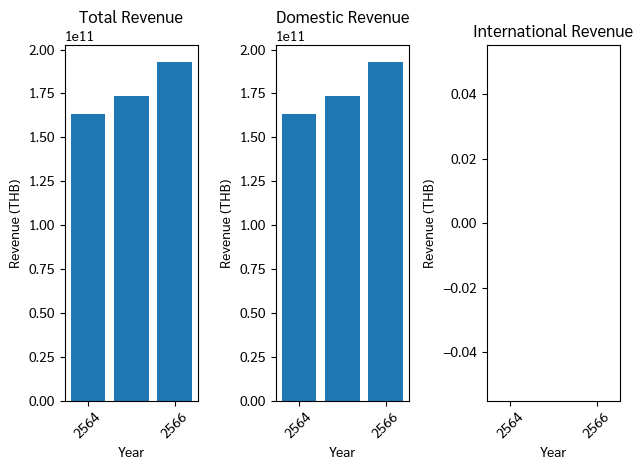

In [17]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Matplotlib to create at least 3 visualisations to ease investors. You should use subplot for presentation and rotate X-axis label with 45 degree.
3. Use from IPython.display import HTML, display functions to conclude your data analytics

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

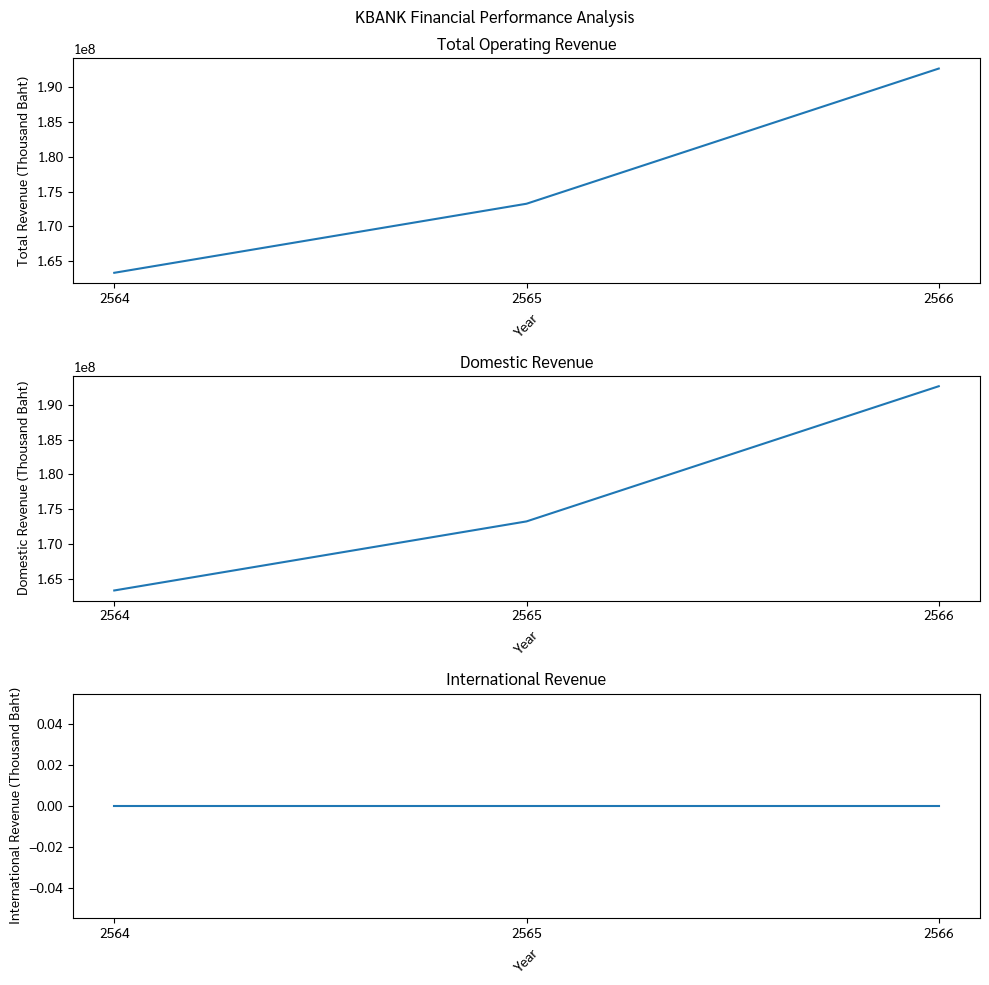

In [18]:
python_code = get_gemini_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

In [19]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail:

โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

รายได้อื่น ตามที่ระบุในงบการเงิน:
| detail                                      | 2564   | 2565   | 2566   |
|:--------------------------------------------|:-------|:-------|:-------|
| รายได้อื่นรวม (พันบาท)                          | 0.00   | 0.00   | 0.00   |
| รายได้อื่นจากการดำเนินงาน (พันบาท)               | 0.00   | 0.00   | 0.00   |
| รายได้อื่นนอกเหนือจากการดำเนินงาน (พันบาท)        | 0.00   | 0.00   | 0.00   |
| ค่าใช้จ่ายการทำวิจัยและพัฒนา (R&D) ในระยะเวลา 3 ปี | N/A    | N/A    | N/A    |
| ที่ผ่านมา                                      |        |        |        |


Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Matplotlib to create at least 3 visualisations to ease investors. You should use subplot for presentation and rotate X-axis label with 45 degree.
3. Use from IPython.display import HTML, display functions to conclude your data analytics

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

```python
# Financial Analysis for KBANK Stock

# The provided data includes balance sheet details and revenue structure of KBANK, which can support investors in making informed decisions.
# The data covers three years (2564, 2565, and 2566) and provides insights into the bank's revenue sources, including interest income and non-interest income.
# By analyzing this data, investors can identify trends, growth rates, and the bank's performance in different areas, which can help them assess the stock's potential.

import matplotlib.pyplot as plt
import numpy as np

# Data for visualizations
years = ['2564', '2565', '2566']
total_revenue = [163348945000, 173257605000, 192653621000]
interest_income = [119390486000, 132998355000, 148443946000]
non_interest_income = [43958459000, 40259250000, 44209675000]

# Plot 1: Total Revenue
plt.subplot(1, 3, 1)
plt.bar(years, total_revenue)
plt.title('Total Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (THB)')
plt.xticks(rotation=45)

# Plot 2: Inter

SyntaxError: unterminated string literal (detected at line 49) (<string>, line 49)

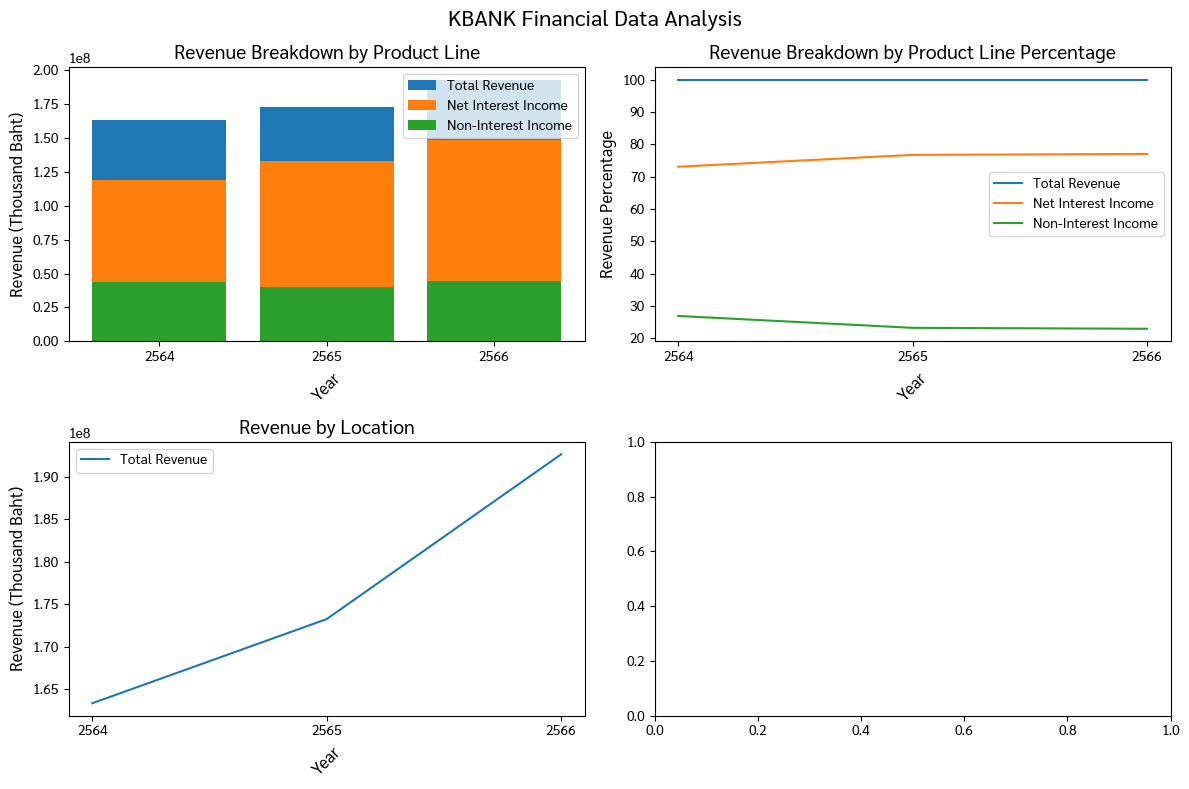

Year,Total Revenue (Thousand Baht),Net Interest Income (Thousand Baht),Non-Interest Income (Thousand Baht),Total Revenue (%),Net Interest Income (%),Non-Interest Income (%)
2564,163348945.0,119390486.0,43958459.0,100.0,73.09,26.91
2565,173257605.0,132998355.0,40259250.0,100.0,76.76,23.24
2566,192653621.0,148443946.0,44209675.0,100.0,77.05,22.95


Year,Total Revenue (Thousand Baht)
2564,163348945.0
2565,173257605.0
2566,192653621.0



Conclusion:
KBANK has shown consistent revenue growth over the past three years. Net Interest Income is the primary revenue driver, representing over 75% of the total revenue. While Non-Interest Income has slightly declined as a percentage of total revenue, it still contributes significantly to the overall growth.
The bank's strong focus on domestic operations is evident, as the majority of its revenue originates from within Thailand.
Further analysis, incorporating balance sheet and profitability metrics, would provide a more comprehensive assessment of KBANK's financial performance and potential.


In [21]:
python_code = get_gemini_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

In [26]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail:

โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

รายได้อื่น ตามที่ระบุในงบการเงิน:
| detail                                      | 2564   | 2565   | 2566   |
|:--------------------------------------------|:-------|:-------|:-------|
| รายได้อื่นรวม (พันบาท)                          | 0.00   | 0.00   | 0.00   |
| รายได้อื่นจากการดำเนินงาน (พันบาท)               | 0.00   | 0.00   | 0.00   |
| รายได้อื่นนอกเหนือจากการดำเนินงาน (พันบาท)        | 0.00   | 0.00   | 0.00   |
| ค่าใช้จ่ายการทำวิจัยและพัฒนา (R&D) ในระยะเวลา 3 ปี | N/A    | N/A    | N/A    |
| ที่ผ่านมา                                      |        |        |        |


What if Bank of Thailand reduce interate rate, how does it affect the company, answer in bullet points?
"""

answer = get_open_ai_completion(prompt, stream=True)
Markdown(answer)

If the Bank of Thailand reduces interest rates, it could have the following effects on KBANK:

* Decreased interest income: KBANK's primary source of income is interest on loans and deposits. A reduction in interest rates would likely decrease the bank's interest income, as the rates on loans and deposits would be lower.
* Lower net interest margin: The difference between the interest income and interest expenses is the net interest margin. With lower interest rates, the net interest margin could decrease, affecting the bank's profitability.
* Increased loan demand: Lower interest rates could stimulate borrowing, as loans become cheaper. This could lead to an increase in loan demand, potentially benefiting KBANK's lending business.
* Higher credit risk: With lower interest rates, borrowers might take on more debt, increasing the risk of loan defaults. This could negatively impact KBANK's asset quality and require higher loan loss provisions.
* Impact on fee-based income: KBANK also gen

If the Bank of Thailand reduces interest rates, it could have the following effects on KBANK:

* Decreased interest income: KBANK's primary source of income is interest on loans and deposits. A reduction in interest rates would likely decrease the bank's interest income, as the rates on loans and deposits would be lower.
* Lower net interest margin: The difference between the interest income and interest expenses is the net interest margin. With lower interest rates, the net interest margin could decrease, affecting the bank's profitability.
* Increased loan demand: Lower interest rates could stimulate borrowing, as loans become cheaper. This could lead to an increase in loan demand, potentially benefiting KBANK's lending business.
* Higher credit risk: With lower interest rates, borrowers might take on more debt, increasing the risk of loan defaults. This could negatively impact KBANK's asset quality and require higher loan loss provisions.
* Impact on fee-based income: KBANK also generates income from fees and commissions. A reduction in interest rates might lead to a decrease in fee-based income, as customers might be less likely to engage in certain financial transactions.
* Potential for increased competition: Lower interest rates could lead to increased competition among banks, as they might need to offer more attractive rates to customers to maintain market share. This could pressure KBANK's margins and market position.
* Effect on foreign exchange income: KBANK has international operations, and changes in interest rates could affect foreign exchange income. A reduction in Thai interest rates might lead to a depreciation of the Thai baht, which could impact the bank's foreign exchange income.
* Impact on treasury income: KBANK's treasury division invests in various financial instruments, such as government bonds. A reduction in interest rates could affect the yields on these investments, impacting the bank's treasury income.

In [27]:
answer = get_gemini_completion(prompt, stream=True)
Markdown(answer)

## Impact of a Bank of Thailand Interest Rate Reduction on KBANK:

* **Reduced Net Interest Income:** Lower interest rates mean KBANK will earn less interest on its loans. This directly affects the bank's most significant revenue source, leading to lower net interest income.
* **Increased Competition:**  Lower rates might prompt other financial institutions to offer more competitive rates on deposits and loans, potentially leading to an increase in competition for KBANK.
* **Impact on Loan Demand:**  A lower interest rate environment could boost demand for loans, potentially leading to increased loan growth and potentially offsetting the impact of lower interest income. 
* **Impact on Deposit Rates:** KBANK may have to offer lower interest rates on deposits to remain competitive. This could affect customer deposits and overall liquidity. 
* **Potential for Increased Non-Interest Income:** As interest rates fall, customers may look for alternative investment options. KBANK could capitalize on this trend by offering more non-interest generating services, such as wealth management, insurance, and other financial products.
* **Effect on Asset Quality:**  While lower interest rates may stimulate the economy and loan demand, it also carries risks. Lower rates can potentially lead to increased non-performing loans (NPLs) in the future. KBANK will need to closely monitor asset quality and adjust its risk management strategies accordingly.
* **Overall Impact:** The overall impact of an interest rate reduction on KBANK is complex and dependent on various factors. The bank's profitability, loan growth, and risk profile will all be affected. How successfully KBANK manages these challenges will determine its ultimate performance. 


In [33]:
prompt = """
As as financial analyst, show me example of questions in bullet points to evaluate the balance sheet the company:

let's see the available data is limited and you can only:
- โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:
- โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:
- รายได้อื่น ตามที่ระบุในงบการเงิน:


KBANK: "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"
"""
question = get_gemini_completion(prompt, stream=True)
Markdown(question)

## Evaluating KBANK's Balance Sheet with Limited Data:

**Focus on Revenue Structure:**

* **Product/Business Segment Breakdown:** 
    * What are the main revenue-generating segments within KBANK (e.g., commercial banking, investment banking, insurance)?
    *  What percentage of total revenue does each segment contribute?
    * How has the revenue mix changed over time?
* **Domestic vs. International Revenue:**
    * What percentage of revenue is generated domestically? Internationally?
    *  Which geographic regions contribute the most to international revenue?
    * What are the growth trends for domestic and international revenue?
* **Other Revenue:**
    * What is the nature of "other revenue" reported in the financial statements? 
    * What percentage of total revenue does this represent?
    * Is there any significant change in other revenue over time? 

**Additional Questions to Consider:**

* **Industry Comparisons:**
    * How does KBANK's revenue structure compare to other major banks in Thailand?
    * Are there any significant differences that need to be analyzed further?
* **Growth Potential:**
    * Are there any segments or regions with strong growth potential?
    * What are the factors driving this growth?
* **Competitive Advantage:**
    * What are KBANK's competitive advantages in its key markets?
    * Are these advantages sustainable over time?

**Important Note:** 

This information is primarily based on the available data and may not be comprehensive.  A thorough analysis requires access to KBANK's financial statements and a deep understanding of its business model. 


In [34]:
prompt = f"""
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail:

โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

รายได้อื่น ตามที่ระบุในงบการเงิน:
| detail                                      | 2564   | 2565   | 2566   |
|:--------------------------------------------|:-------|:-------|:-------|
| รายได้อื่นรวม (พันบาท)                          | 0.00   | 0.00   | 0.00   |
| รายได้อื่นจากการดำเนินงาน (พันบาท)               | 0.00   | 0.00   | 0.00   |
| รายได้อื่นนอกเหนือจากการดำเนินงาน (พันบาท)        | 0.00   | 0.00   | 0.00   |
| ค่าใช้จ่ายการทำวิจัยและพัฒนา (R&D) ในระยะเวลา 3 ปี | N/A    | N/A    | N/A    |
| ที่ผ่านมา                                      |        |        |        |


Act as the best financial analyst and try your best answer the following question for the information and you are allowed to infer the answer from your experiece
{question}
"""

answer = get_open_ai_completion(prompt, stream=True)
Markdown(answer)

Based on the provided data, I will attempt to answer the questions to the best of my ability.

**Product/Business Segment Breakdown:**

* The main revenue-generating segments within KBANK are not explicitly stated in the data. However, we can infer that the bank generates revenue from interest income and non-interest income.
* The percentage of total revenue contributed by each segment is as follows:
	+ Interest income: 73.09% in 2564, 76.76% in 2565, and 77.05% in 2566.
	+ Non-interest income: 26.91% in 2564, 23.24% in 2565, and 22.95% in 2566.
* The revenue mix has shifted slightly over time, with interest income becoming a larger proportion of total revenue.

**Domestic vs. International Revenue:**

* The data does not provide a clear breakdown of domestic and international revenue. However, we know that KBANK has a presence in 8 countries, suggesting that a portion of its revenue is generated internationally.
* Without specific data, we cannot determine the exact percentage of reve

Based on the provided data, I will attempt to answer the questions to the best of my ability.

**Product/Business Segment Breakdown:**

* The main revenue-generating segments within KBANK are not explicitly stated in the data. However, we can infer that the bank generates revenue from interest income and non-interest income.
* The percentage of total revenue contributed by each segment is as follows:
	+ Interest income: 73.09% in 2564, 76.76% in 2565, and 77.05% in 2566.
	+ Non-interest income: 26.91% in 2564, 23.24% in 2565, and 22.95% in 2566.
* The revenue mix has shifted slightly over time, with interest income becoming a larger proportion of total revenue.

**Domestic vs. International Revenue:**

* The data does not provide a clear breakdown of domestic and international revenue. However, we know that KBANK has a presence in 8 countries, suggesting that a portion of its revenue is generated internationally.
* Without specific data, we cannot determine the exact percentage of revenue generated domestically and internationally.
* Similarly, we cannot identify the geographic regions contributing the most to international revenue or analyze growth trends for domestic and international revenue.

**Other Revenue:**

* The nature of "other revenue" is not specified in the data.
* Other revenue represents 0% of total revenue in all three years, indicating that this category is not a significant contributor to KBANK's overall revenue.
* There is no significant change in other revenue over time, as it remains at 0% for all three years.

**Additional Questions to Consider:**

* **Industry Comparisons:** Without data on other major banks in Thailand, it is difficult to compare KBANK's revenue structure to its peers. However, we can infer that KBANK's reliance on interest income is consistent with the general trend in the banking industry.
* **Growth Potential:** Based on the provided data, it is difficult to identify specific segments or regions with strong growth potential. However, the overall growth in revenue suggests that KBANK may have opportunities for expansion.
* **Competitive Advantage:** The data does not provide information on KBANK's competitive advantages. However, its extensive network of branches and electronic channels, as well as its international presence, may contribute to its competitive position in the market.

Please note that this analysis is limited by the available data and may not provide a comprehensive understanding of KBANK